In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the data
data = pd.read_csv("ap.csv")
data



,date,number_of_cases
0,1969,5
1,1970,14
2,1971,44
3,1972,45
4,1973,55
5,1974,50
6,1975,55
7,1976,64
8,1977,70
9,1978,120


In [3]:
# Convert date to a numerical feature
data['date'] = pd.to_datetime(data['date'])
data['date'] = (data['date'] - data['date'].min())  / np.timedelta64(1,'D')

In [4]:
# Split the data into training and testing sets
train_data = data[:int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]



In [5]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2)
train_data_poly = poly.fit_transform(train_data[['date']])
test_data_poly = poly.fit_transform(test_data[['date']])


In [6]:
# Train the model
reg = LinearRegression().fit(train_data_poly, train_data['number_of_cases'])
reg


LinearRegression()

In [7]:
# Make predictions on the test set
predictions = reg.predict(test_data_poly)
predictions

array([1281.20818815, 1312.90071712, 1344.54104205, 1376.12916295,
       1407.66507982, 1439.14879264, 1470.58030143, 1501.95960619,
       1533.28670691, 1564.5616036 , 1595.78429625])

In [8]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(test_data['number_of_cases'], predictions))
rmse


396.3525675662631

In [9]:
# Calculate the coefficient of determination (R^2)
r2 = r2_score(test_data['number_of_cases'], predictions)
r2



-2.466824858403815

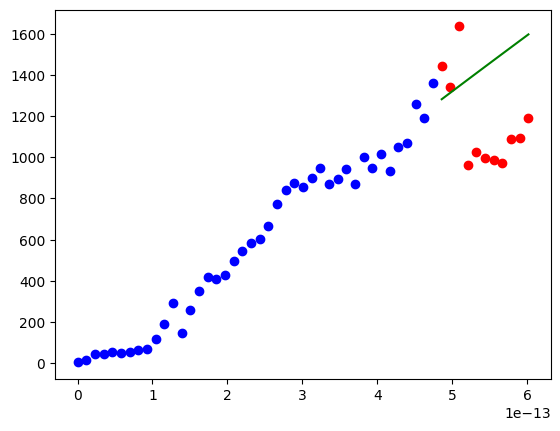

In [10]:
# Visualize the data and the prediction
plt.scatter(train_data['date'], train_data['number_of_cases'], color = 'blue')
plt.scatter(test_data['date'], test_data['number_of_cases'], color = 'red')
plt.plot(test_data['date'], predictions, color = 'green')
plt.show()

In [11]:
# Print the results
print("Root Mean Squared Error: ", rmse)
print("R^2: ", r2)

Root Mean Squared Error:  396.3525675662631
R^2:  -2.466824858403815
